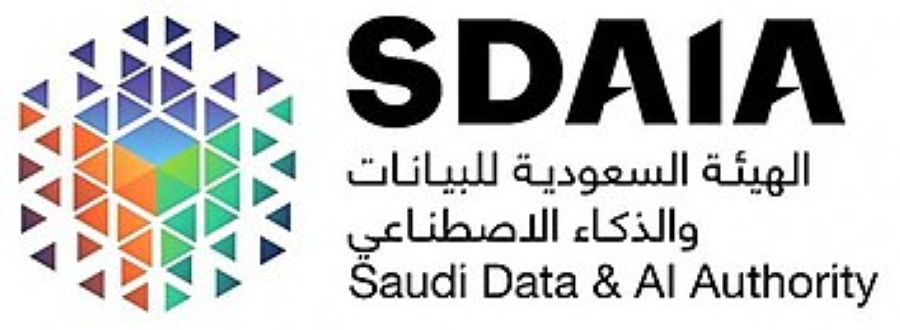

# **Chicago crimes**

# Download Data

In [ ]:
#@title
!wget "https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv"

# Preprocess Data


**Import libraries**

In [ ]:
#@title
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Read and show dataset**

In [ ]:
#@title
data = pd.read_csv('./rows.csv') #Read dataset

**Show the number of rows and columns**

In [ ]:
data.shape 

In [ ]:
data.columns

**Data Cleaning**

Here we drop the unnecessary features (columns)

In [ ]:
#@title

data.drop(['ID', 'Case Number', 'IUCR', 'Description', 'Arrest', 'FBI Code', 'Latitude','Longitude', 'Location', 'Updated On', 'Date', 'X Coordinate', 'Y Coordinate', 'Domestic'],axis=1, inplace=True)

In [ ]:
#@title
display(data)# Shows the data

In [ ]:
data.shape #Show the number of rows and columns after remove

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist(figsize=(15,15))
plt.suptitle('Histograms shows count of each category for different features', fontsize=22);

In [ ]:
#@title
X = data.copy()

In [ ]:
data.isnull().sum(axis = 1)

In [ ]:
data.info()

Some values in the location description are filled with 'Nan', so here we create a new value and name it 'Others'. to replace the 'NaN'

In [ ]:
#@title
X['Location Description'].fillna('Others', inplace=True)

In [ ]:
#@title
X.shape

**Check dublicated rows**

In [ ]:
duplicateDFRow = data[data.duplicated()]
print(duplicateDFRow)

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

**Data Transformation**

In [ ]:
data.dtypes

In [ ]:
data['Block'].value_counts()

In [ ]:
data['Primary Type'].value_counts()

In [ ]:
data['Location Description'].value_counts()

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

## Feature Engineering

In this section, we will reduce the number of types and group them into smaller number of categories

Here we check how many type we have

In [ ]:
#@title
X['Primary Type'].value_counts()

Here we create a dictionary to categorize the crime types into smaller categories as all of the types in the dictionary's values will be replaced by the corresponding key value.

In [ ]:
#@title
categories = {
    'forbidden practices':['narcotics', 'prostitution', 'gambling', 'obscenity',
                           'narcotic violation'],
    'theft': ['burglary', 'deceptive practice', 'motor vehicle theft', 'robbery'],
    'assault': ['crime sexual assault', 'offense involving children', 'sex offense',
               'homicide', 'human trafficking', 'criminal sexual assault', 'assault'],
    'public peace violation' : ['weapons violation', 'criminal defacement',
                                'criminal trespass', 'arson', 'kidnapping',
                                'stalking','intimidation', 'public indecency']
}

In [ ]:
#@title
for category in categories:
  X['Primary Type'].replace([x.upper() for x in categories[category]], category.upper(), inplace=True)

Now we check the new types in the dataset

In [ ]:
#@title
X['Primary Type'].value_counts()

Here we are useing a LabelEncoder to encode the data. It replaces string values with numerical values.

In [ ]:
#@title
columns_to_encode = ['Block', 'Location Description', 'District', 'Ward', 'Community Area', 'Year', 'Primary Type']
for column in columns_to_encode:
  X[column] = LabelEncoder().fit_transform(X[column])

Here we see the dataset after encoding

In [ ]:
#@title
display(X)

Here we choose our target variable (the onne we want to predict) and drop it from the dataset

In [ ]:
#@title
y = X['Primary Type']

In [ ]:
#@title
X.drop(['Primary Type'],axis=1, inplace=True)

Here we decide the data into train and test set

In [ ]:
#@title
clf = RandomForestClassifier(n_estimators=7, criterion='entropy')

Here we initiate a random forest classfier. the n_estimators hyper-parameter coresspondes to the number of trees in the forest.

**Feel free to increase it and test the accuracy**

In [ ]:
#@title
clf = RandomForestClassifier(n_estimators=7, criterion='entropy')

Here we do the training and test the accuracy

In [ ]:
#@title
clf.fit(X_train, y_train)

In [ ]:
#@title
y_pred = clf.predict(X_test)

In [ ]:
#@title
accuracy = accuracy_score(y_pred, y_test)

In [ ]:
#@title
accuracy

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)